<b><h2> Importing Libraries </h2></b>

In [46]:
# data analysis and wrangling
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithm
from sklearn.cluster import KMeans

# metrics to evaluate model result
from sklearn import metrics

<b><h2> Visualizing the Data </h2></b>

In [47]:
# acquires the data
df = pd.read_csv('flowers.csv')

In [48]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [50]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


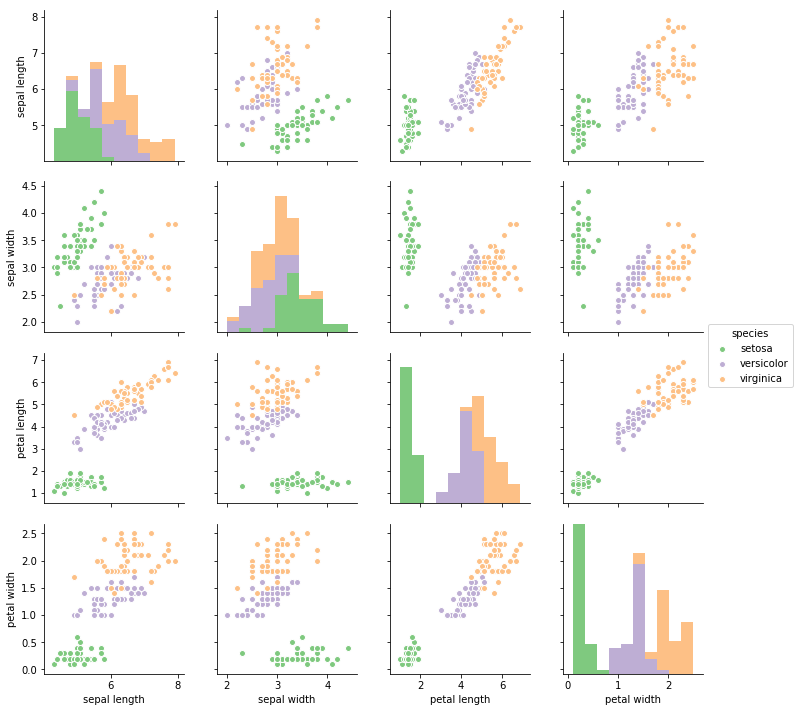

In [51]:
# scatter plots of the data originally clustered
sns.pairplot(df, hue='species', palette='Accent')

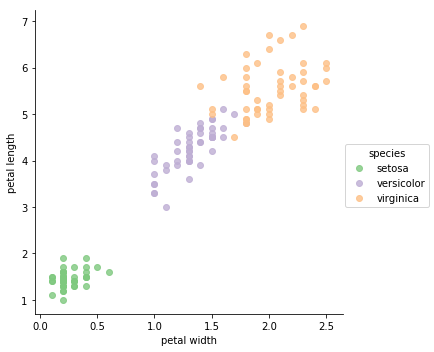

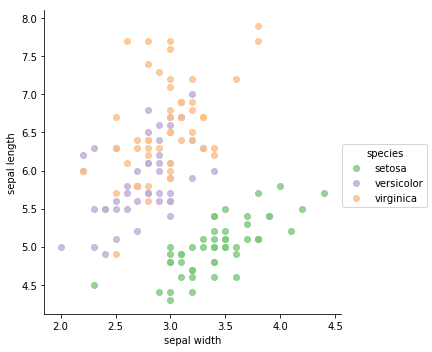

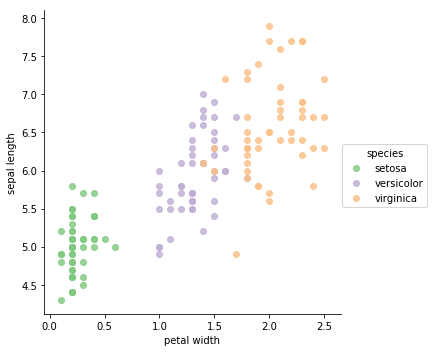

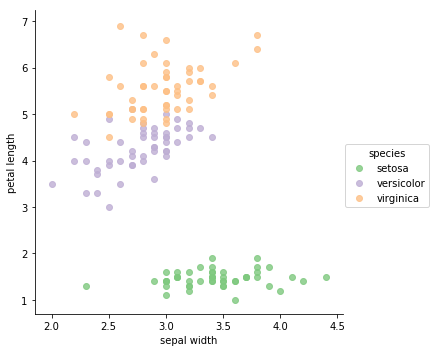

In [52]:
# another way to represent scatter plots by species
sns.lmplot(x='petal width', y='petal length', data=df, hue='species', palette='Accent', fit_reg=False)
sns.lmplot(x='sepal width', y='sepal length', data=df, hue='species', palette='Accent', fit_reg=False)
sns.lmplot(x='petal width', y='sepal length', data=df, hue='species', palette='Accent', fit_reg=False)
sns.lmplot(x='sepal width', y='petal length', data=df, hue='species', palette='Accent', fit_reg=False)

<b><h2> K-Means Clustering </h2></b>

In [53]:
# by setting the random state to 30 we can better visualize the plots and the real accuracy. 
# Because using 30 as random state we get K-Means to define setosa = 0, versicolor = 1 and 
# virginica = 2. Which is the same that we will define

kmeans = KMeans(n_clusters=3, random_state=30) # creates an instance of K-Means model with 3 clusters

In [54]:
# function to convert strings into integers to match random state
def converter(cluster):
    if cluster == 'setosa':
        return 0
    elif cluster == 'versicolor':
        return 1
    else:
        return 2

df['cluster'] = df['species'].apply(converter) # creates a new column which is a integer representation of species
kmeans.fit(df.drop(['species', 'cluster'], axis=1)) # fits the models to all data except for the species and cluster columns

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=30, tol=0.0001, verbose=0)

<b><h2> Evaluation </h2></b>

In [55]:
# model's scores based on ground truth and K-means predicted labels
print("Accuracy:\t", metrics.accuracy_score(df['cluster'], kmeans.labels_)) # accuracy score
print("Homogeneity:\t", metrics.homogeneity_score(df['cluster'], kmeans.labels_)) # homogeneity score
print("Completeness:\t", metrics.completeness_score(df['cluster'], kmeans.labels_)) # completeness score
print("V:\t\t", metrics.v_measure_score(df['cluster'], kmeans.labels_)) # v-measure score
print("RI:\t\t", metrics.adjusted_rand_score(df['cluster'], kmeans.labels_)) # rand index score
print("AMI:\t\t", metrics.adjusted_mutual_info_score(df['cluster'], kmeans.labels_), "\n")  # adjusted mutual information
print("Confusion matrix:\n", metrics.confusion_matrix(df['cluster'], kmeans.labels_), "\n") # confusion matrix
print("Classification report:\n", metrics.classification_report(df['cluster'], kmeans.labels_)) # classification report

Accuracy:	 0.8933333333333333
Homogeneity:	 0.7514854021988338
Completeness:	 0.7649861514489815
V:		 0.7581756800057784
RI:		 0.7302382722834697
AMI:		 0.7483723933229484 

Confusion matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]] 

Classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.77      0.96      0.86        50
          2       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



<b><h1> 4)a)b) </h1></b>

Text(0.5,0,'petal width')

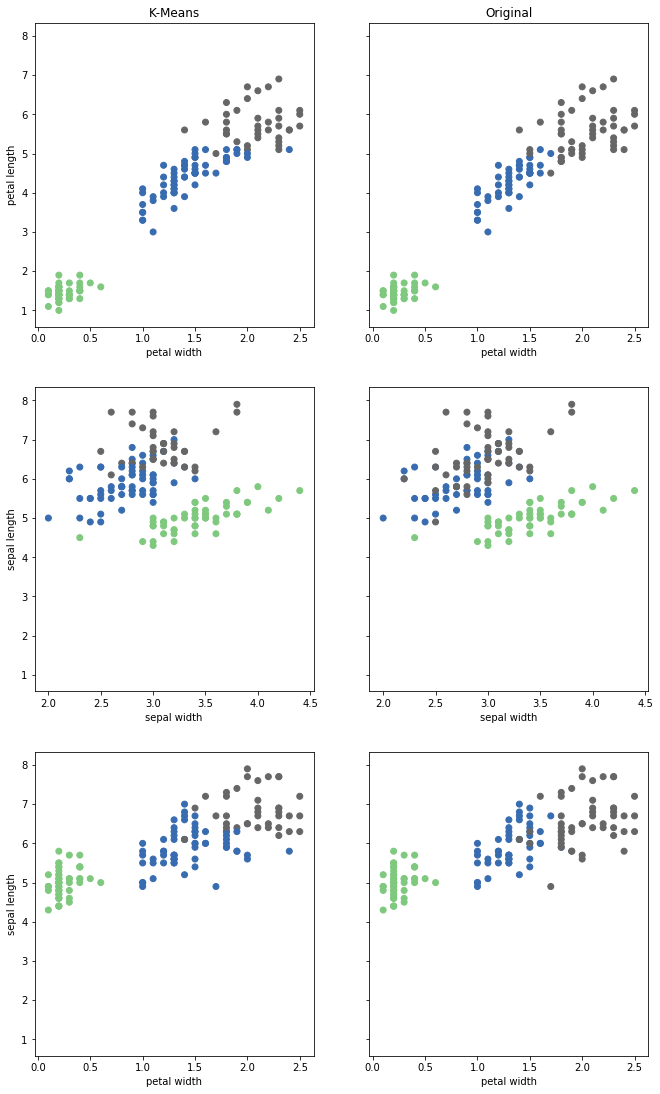

In [56]:
# plotting K-Means predicted labels and the original labels of the dataset.

f, axes = plt.subplots(3, 2, sharey=True, figsize=(11, 19))
axes[0, 0].set_title('K-Means')
axes[0, 0].scatter(df['petal width'], df['petal length'], c=kmeans.labels_, cmap='Accent')
axes[0, 0].set_xlabel('petal width')
axes[0, 0].set_ylabel('petal length')
axes[0, 1].set_title('Original')
axes[0, 1].scatter(df['petal width'], df['petal length'], c=df['cluster'], cmap='Accent')
axes[0, 1].set_xlabel('petal width')

axes[1, 0].scatter(df['sepal width'], df['sepal length'], c=kmeans.labels_, cmap='Accent')
axes[1, 0].set_xlabel('sepal width')
axes[1, 0].set_ylabel('sepal length')
axes[1, 1].scatter(df['sepal width'], df['sepal length'], c=df['cluster'], cmap='Accent')
axes[1, 1].set_xlabel('sepal width')

axes[2, 0].scatter(df['petal width'], df['sepal length'], c=kmeans.labels_, cmap='Accent')
axes[2, 0].set_xlabel('petal width')
axes[2, 0].set_ylabel('sepal length')
axes[2, 1].scatter(df['petal width'], df['sepal length'], c=df['cluster'], cmap='Accent')
axes[2, 1].set_xlabel('petal width')

<b><h1> 4)c) </h1></b>
<b><h2> Conclusion </h2></b>

K-Means is arbitrary in its labelling, meaning that in one case, the cluster 1 could refer to setosa but in another random state, cluster 1 could refer to versicolor. As we defined, by using the function called converter, setosa to be 0, versicolor to be 1 and virginica to be 2, we had to find a random state to K-Means that would match the species like we defined. We found that 30 is the correct random state to do so. Therefore, by looking at the scores that compare the ground truth and K-means predicted labels, we can notice that the algorithm performed properly. Its performance can also be checked by visually comparing K-Means clusters and the original clusters and noticing that K-Means correctly clustered most of the data points. The reason to such good performance is that, as we had the ground truth, we already knew which K to pick. If we did not know which K to pick, we would have to use some method, like the elbow method, to better predict the K value. Furthermore, we can see that setosa was far away from both versicolor and virginica, making setosa easier to separate. Moreover, K-Means performs better if our dataset has equal sized clusters, which is our case, we have 50 of each iris' species, those species have similar variances and are roughly spherical.